In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('sample.csv')

In [3]:
df.drop(['Unnamed: 0', 'show_id'], axis= 1, inplace= True)

In [4]:
df.head()

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,director
0,Movie,Summer of '92,"Ulrich Thomsen, Henning Jensen, Mikkel Boe Føl...","Denmark, United Kingdom",2016-07-10,2015,NR,94 min,"Dramas, International Movies, Sports Movies",When a quirk of fate kicks the Danish national...,Kasper Barfoed
1,Movie,The Last Hangover,"Fábio Porchat, Gregório Duvivier, Antonio Tabe...",Brazil,2018-12-21,2018,TV-MA,44 min,"Comedies, International Movies","In this biblical ""Hangover"" spoof, the apostle...",Rodrigo Van Der Put
2,Movie,Kucch To Hai,"Tusshar Kapoor, Esha Deol, Natasha, Jeetendra,...",India,2019-05-15,2003,TV-14,136 min,"Dramas, International Movies, Thrillers",A student tries to steal a test from a teacher...,Anil V. Kumar
3,Movie,The Midas Touch,"Chapman To, Charlene Choi, Gao Yunxiang, Shati...",Hong Kong,2019-07-21,2013,TV-14,98 min,"Comedies, International Movies",A debt collector takes over the management of ...,Chi Keung Fung
4,TV Show,Monty Python's Almost the Truth,"Graham Chapman, Eric Idle, John Cleese, Michae...",United Kingdom,2018-10-02,2009,NR,1 Season,"British TV Shows, Docuseries","The legacy of comedy group Monty Python, whose...",NaN


In [5]:
df.tail()

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,director
619,TV Show,Cocaine,NaN,United Kingdom,2016-08-01,2005,TV-14,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Three films chronicle the cocaine trade's swee...,NaN
620,Movie,Filosofi Kopi The Movie,"Chicco Jerikho, Rio Dewanto, Julie Estelle, Ja...",Indonesia,2018-10-11,2015,TV-PG,118 min,"Dramas, International Movies",The level-headed owner of a struggling coffee ...,Angga Dwimas Sasongko
621,TV Show,Droppin' Cash: Los Angeles,NaN,United States,2019-08-28,2019,TV-MA,2 Seasons,Reality TV,This Complex series follows the paper trail of...,NaN
622,Movie,Derren Brown: Miracle,Derren Brown,United Kingdom,2018-06-22,2018,TV-MA,74 min,International Movies,Illusionist Derren Brown reinvents the concept...,NaN
623,Movie,Maine Pyaar Kyun Kiya,"Salman Khan, Sushmita Sen, Sohail Khan, Katrin...",India,2019-12-31,2005,TV-14,137 min,"Comedies, International Movies, Music & Musicals","After lying to his girlfriend, orthopedic surg...",David Dhawan


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          624 non-null    object
 1   title         624 non-null    object
 2   cast          554 non-null    object
 3   country       581 non-null    object
 4   date_added    622 non-null    object
 5   release_year  624 non-null    int64 
 6   rating        624 non-null    object
 7   duration      624 non-null    object
 8   listed_in     624 non-null    object
 9   description   624 non-null    object
 10  director      435 non-null    object
dtypes: int64(1), object(10)
memory usage: 53.8+ KB


In [7]:
df.shape

(624, 11)

In [8]:
df.columns

Index(['type', 'title', 'cast', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'director'],
      dtype='object')

##### INITIAL ANALYSIS
1. There are 624 observations.
2. There are missing data in cast, country, date_added and director columns.

### Handling Missing Data

In [9]:
df.dropna(inplace= True)

In [10]:
df.sort_values(by= 'date_added', inplace= True) # Sorted Values by Date

### Univariable Analysis

In [11]:
plt.style.use('bmh')

In [12]:
categorical_col = ['type', 'listed_in', 'release_year', 'rating']
continuous_col = ['date_added', 'release_year']
others = ['cast']

#### Categorical Data

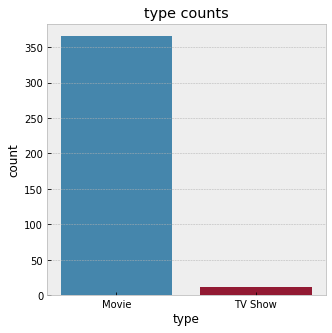

In [13]:
plt.figure(figsize= (5, 5))
plt.title('type counts')
sns.countplot(df['type'])

In [14]:
df['type'].value_counts()

Movie      365
TV Show     11
Name: type, dtype: int64

There are more Movies as compared to TV Shows in the sample dataset.
1. 365 Movies
2. 11 TV Shows

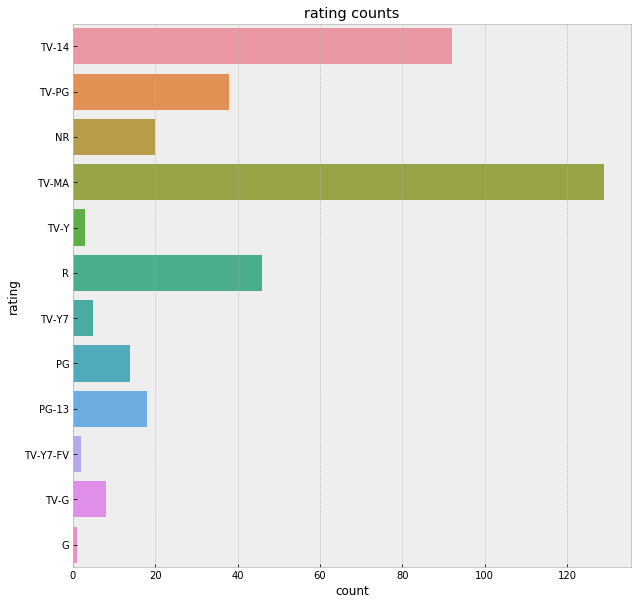

In [15]:
plt.figure(figsize= (10, 10))
plt.title('rating counts')
sns.countplot(y= 'rating', data= df)

In [16]:
print('Number of Unique Ratings:', len(df['rating'].unique()))

Number of Unique Ratings: 12


In [17]:
TV = [w for w in list(set(df['rating'])) if 'TV' in w]
TV

['TV-Y7', 'TV-PG', 'TV-MA', 'TV-14', 'TV-G', 'TV-Y7-FV', 'TV-Y']

Rating Details
1. TV-Y -> For all children.
2. TV-Y7 -> For children above 7.
3. TV-Y7 -> For children above 7, programme contains fantasy violence.
4. TV-G -> General audience.
5. TV-PG -> Parental guidance is advised.
6. TV-14 -> May not be suitable for children below 15.
7. TV-MA -> Mature audiences.

In [18]:
Movies = [w for w in list(set(df['rating'])) if not 'TV' in w]
Movies

['PG-13', 'G', 'PG', 'R', 'NR']

Rating Details

1. G -> General Audiences: All ages.

2. PG -> Parental Guidance Suggested: Some materials may not be suitable for children.

3. PG-13 -> Parents Strongly Cautioned: Some materials may be inappropriate for children under 13.

4. R -> Restricted: Under 17 requires accompanying parent or adult guardian.

5. NR -> Not Rated.

Ratings are interchangable, movies can have tv ratings and/or tv shows can have movie ratings. From the countplot, it seems that the movies and tv shows are mostly targetted towards more matured audiences, 14 and above. This could be because these age group have greater access to Netflix (ie: internet connection, laptop/phones etc, and credit cards)

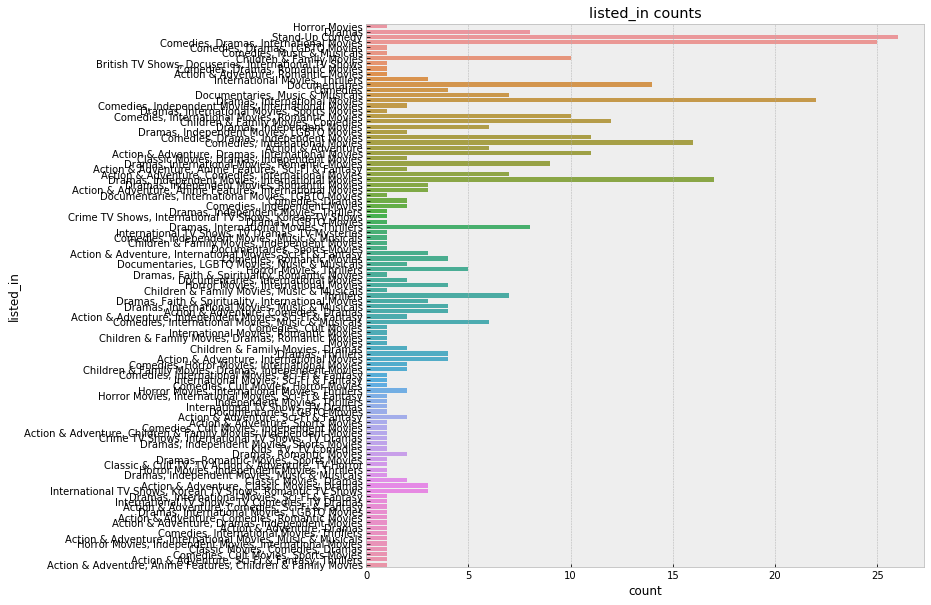

In [19]:
plt.figure(figsize= (10, 10))
plt.title('listed_in counts')
sns.countplot(y= 'listed_in', data= df)

WAYYYYYYYYYYYYY TOO MANY DIFFERENT COMBINATIONS OF CATEGORIES TO LIST A MOVIE IN

In [20]:
# Word Cloud for listed_in
from wordcloud import WordCloud

words = ', '.join(list(df['listed_in']))
words = words.split(', ')
words = ' '.join(words)

wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white',  
                min_font_size = 20).generate(words) 

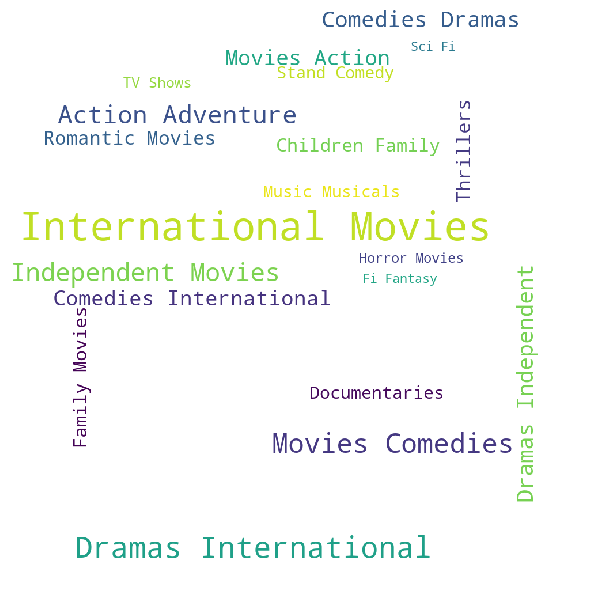

In [21]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [22]:
# Analysis on listed_in
listed_in = pd.Series(', '.join(list(df['listed_in'])).split(', '))

In [23]:
listed_in.value_counts()

International Movies        174
Dramas                      167
Comedies                    120
Independent Movies           60
Action & Adventure           57
Romantic Movies              35
Thrillers                    34
Children & Family Movies     31
Documentaries                28
Stand-Up Comedy              26
Music & Musicals             24
Horror Movies                18
Sci-Fi & Fantasy             15
LGBTQ Movies                  9
International TV Shows        9
Classic Movies                8
Sports Movies                 6
Anime Features                6
Korean TV Shows               4
Faith & Spirituality          4
Cult Movies                   4
TV Dramas                     4
Romantic TV Shows             3
TV Comedies                   2
Crime TV Shows                2
Kids' TV                      1
Classic & Cult TV             1
Docuseries                    1
TV Action & Adventure         1
TV Horror                     1
Movies                        1
British 

In [24]:
print('Number of Unique Categories:', len(listed_in.unique()))

Number of Unique Categories: 33


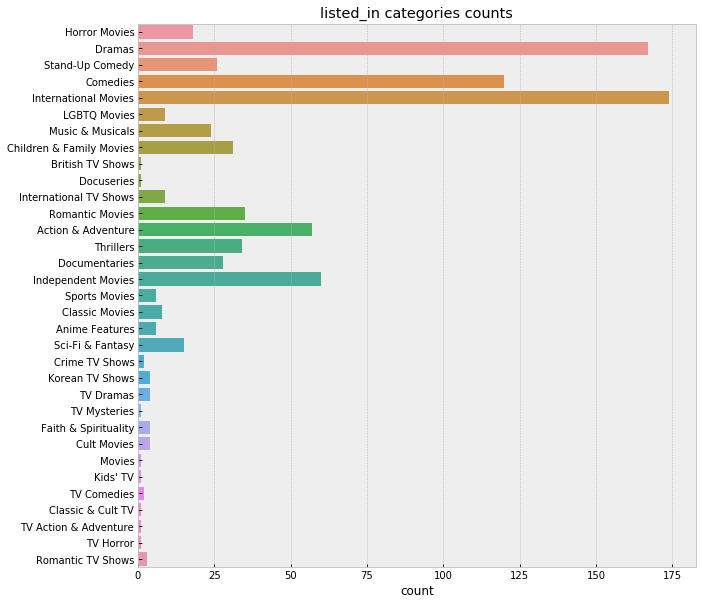

In [25]:
plt.figure(figsize= (10, 10))
plt.title('listed_in categories counts')
sns.countplot(y= listed_in)

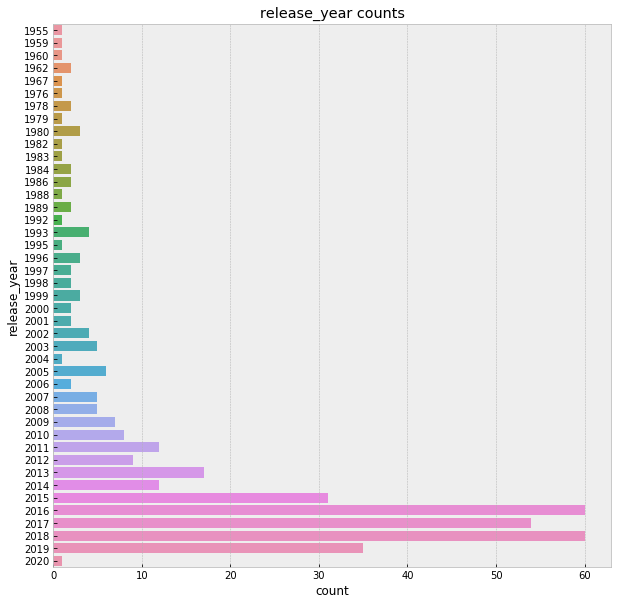

In [26]:
plt.figure(figsize= (10, 10))
plt.title('release_year counts')
sns.countplot(y= 'release_year', data= df)

The bulk of Movies/TV Shows released is between 2015 and 2019. This dataset was curated up till 2020, therefore to include conclude that Movies/TV Shows released in 2020 is very little is an absurd assumption. 

### Continous Data

In [27]:
print('Earliest Movie Released By Year:', df['release_year'].min())
print('Latest Movie Released By Year:', df['release_year'].max())

Earliest Movie Released By Year: 1955
Latest Movie Released By Year: 2020


In [28]:
print('Earliest Movie Added By Date:', df.loc[394]['date_added'])
print('Latest Movie Added By Date:', df.loc[5]['date_added'])

Earliest Movie Added By Date: 2009-11-18
Latest Movie Added By Date: 2020-01-16


In [29]:
df['date_added'].value_counts()

2018-03-01    11
2017-05-01     9
2018-10-01     8
2020-01-01     8
2018-11-01     7
              ..
2018-04-05     1
2017-06-09     1
2017-09-18     1
2017-04-02     1
2019-06-29     1
Name: date_added, Length: 238, dtype: int64

In [30]:
print('Most Number of Movies/TV Shows Released in a Day: 11')
print('1 March 2018')

Most Number of Movies/TV Shows Released in a Day: 11
1 March 2018


In [31]:
print('Least Number of Movies/TV Shows Released in a Day (Many Days): 1')


Least Number of Movies/TV Shows Released in a Day (Many Days): 1


In [32]:
list_of_dates_single_release = sorted(list(pd.DataFrame(df['date_added'].value_counts())[pd.DataFrame(df['date_added'].value_counts())['date_added'] == 1].index))

In [33]:
print('Number of Days with Single Release:', len(list_of_dates_single_release))

Number of Days with Single Release: 174


In [34]:
# TO DO: Groupby Year
def year(date):
    return date[:4]

years = df['date_added'].apply(year)
pd.DataFrame(years.value_counts()).rename({'date_added' : 'year_added'}, axis= 1)

,year_added
2019,135
2018,113
2017,83
2016,24
2020,12
2015,5
2011,2
2009,1
2013,1


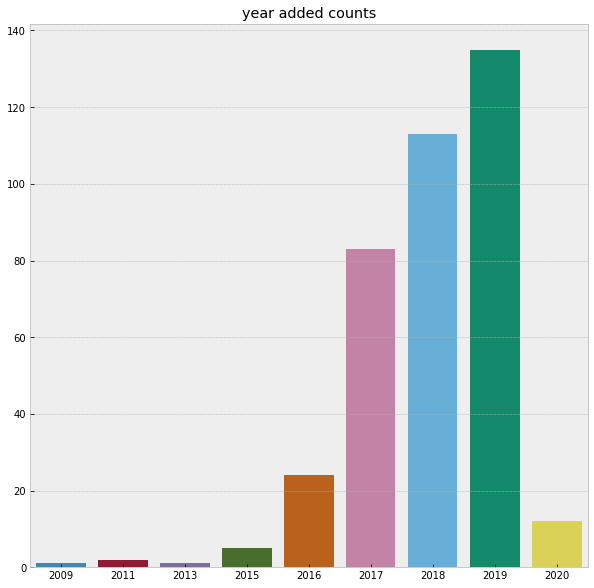

In [35]:
year = [2019, 2018, 2017, 2016, 2020, 2015, 2011, 2009, 2013]
counts = [135, 113, 83, 24, 12, 5, 2, 1, 1]
plt.figure(figsize= (10, 10))
plt.title('year added counts')
sns.barplot(year, counts)

There seems to be a trend in year added counts and year released counts. Investigate that in Bivariate Analysis!

Some Questions to answer:
1. When did netflix FIRST start streaming? 2007
2. What did they first release?

About Netflix:
1. Founded in 29 August 1997
2. Started streaming in 2007
3. Paid subscription services

https://en.wikipedia.org/wiki/Timeline_of_Netflix

#### Analysis on Casts and Directors

In [36]:
cast = ', '.join(list(df['cast'])).split(', ')
print('Number of Casts into Duplicates:', len(cast))

Number of Casts into Duplicates: 2843


In [37]:
print('Number of Unique Casts:', len(set(cast)))

Number of Unique Casts: 2621


In [38]:
uni_cast = list(set(cast))

Main casts only, should be expecting more on the main dataset.

In [39]:
director = ', '.join(list(df['director'])).split(', ')
print('Number of Directors into Duplicates:', len(director))

Number of Directors into Duplicates: 419


In [40]:
print('Number of Unique Director:', len(set(director)))

Number of Unique Director: 395


In [41]:
uni_director = list(set(director))

Main director only, should be expecting more on the main dataset.

In [42]:
df['director']

394                        Joe Dante
194                    John Herzfeld
454                  Eric Laneuville
310    Will Lovelace, Dylan Southern
159                      Lance Bangs
                   ...              
260                     Keoni Waxman
350                     Yibrán Asuad
223                  Marek Kanievska
105                  Jeffrey G. Hunt
5                   Yoshiyuki Momose
Name: director, Length: 376, dtype: object

In [43]:
list_director = ', '.join(list(df['director'])).split(', ')
list_director

['Joe Dante',
 'John Herzfeld',
 'Eric Laneuville',
 'Will Lovelace',
 'Dylan Southern',
 'Lance Bangs',
 'Luis Estrada',
 'Kristin Hanggi',
 'Sofia Coppola',
 'Luc Vinciguerra',
 'Alastair Fothergill',
 'Corey Grant',
 'Yuen Wo-Ping',
 'Dani de la Torre',
 'Chris Bell',
 'Josh Alexander',
 'Greg Young',
 'Ricky Gervais',
 'Jay Karas',
 'Andy Capper',
 'Ishaya Bako',
 'Qaushiq Mukherjee',
 'Kasper Barfoed',
 'J.F. Musial',
 'Josh Vietze',
 'Michael Drumm',
 'David Serrano',
 'Ishi Rudell',
 'Michael D. Black',
 'Julien Rambaldi',
 'Marcus Raboy',
 'Chad L. Scheifele',
 'Jeff Margolis',
 'Adam Nimoy',
 'Vikram Gandhi',
 'Julia Hart',
 'Warren P. Sonoda',
 'José Eduardo Belmonte',
 'Barbara Kopple',
 'Jeannie Gaffigan',
 'John Carchietta',
 'Alejandra Márquez Abella',
 'Richard Bates Jr.',
 'Ricky Gervais',
 'Jesús Magaña Vázquez',
 'Giulio Base',
 'Logan Kibens',
 'Paul Tanter',
 'Mahsun Kırmızıgül',
 'Yılmaz Erdoğan',
 'Santosh Sivan',
 'James Ivory',
 'Jarrad Paul',
 'Andrew Mogel',
 

In [44]:
from collections import Counter
print('Top 10 Most Common Directors')
Counter(list_director).most_common(10)

Top 10 Most Common Directors


[('Marcus Raboy', 3),
 ('Raúl Campos', 3),
 ('Jan Suter', 3),
 ('Fernando Ayllón', 3),
 ('Lance Bangs', 2),
 ('Ricky Gervais', 2),
 ('Michael D. Black', 2),
 ('Warren P. Sonoda', 2),
 ('Santosh Sivan', 2),
 ('Leslie Small', 2)]

### Investigate the relationship between duration and type

Hypothesis: All TV Shows have seasons while movies have runtime in minutes

In [45]:
movies = df[df['type'] == 'Movie']
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 394 to 5
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          365 non-null    object
 1   title         365 non-null    object
 2   cast          365 non-null    object
 3   country       365 non-null    object
 4   date_added    365 non-null    object
 5   release_year  365 non-null    int64 
 6   rating        365 non-null    object
 7   duration      365 non-null    object
 8   listed_in     365 non-null    object
 9   description   365 non-null    object
 10  director      365 non-null    object
dtypes: int64(1), object(10)
memory usage: 34.2+ KB


In [46]:
movies['duration'].value_counts()

94 min     12
101 min    12
92 min     10
89 min     10
91 min     10
           ..
155 min     1
157 min     1
125 min     1
46 min      1
116 min     1
Name: duration, Length: 117, dtype: int64

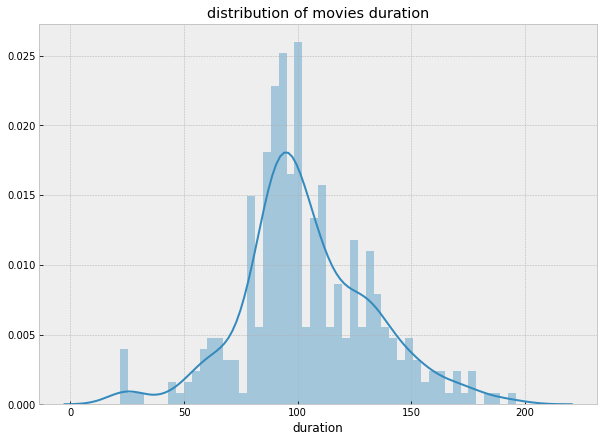

In [47]:
# TO DO: Plot Movies Durations
import re
def tidy(s):
    return int(re.sub(' min', '', s))
m = movies['duration'].apply(tidy)

plt.figure(figsize= (10, 7))
plt.title('distribution of movies duration')
sns.distplot(m, bins= 50)

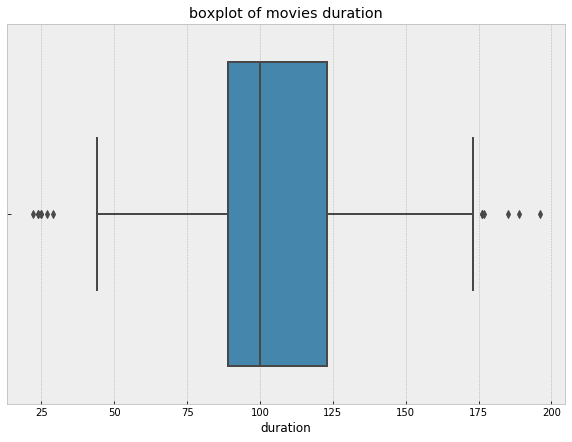

In [48]:
plt.figure(figsize= (10, 7))
plt.title('boxplot of movies duration')
sns.boxplot(m)

In [49]:
q1 = m.quantile(0.25)
median = m.quantile(0.5)
q3 = m.quantile(0.75)
iqr = q3 - q1

print('25th Percentile:', q1)
print('75th Percentile:', q3)
print('Median:', median)
print('Interquantile Range:', iqr)

25th Percentile: 89.0
75th Percentile: 123.0
Median: 100.0
Interquantile Range: 34.0


Median screen time for movies are 100mins or 1h 40mins, from the start to the end.

In [50]:
movies['duration'] = movies['duration'].apply(tidy)

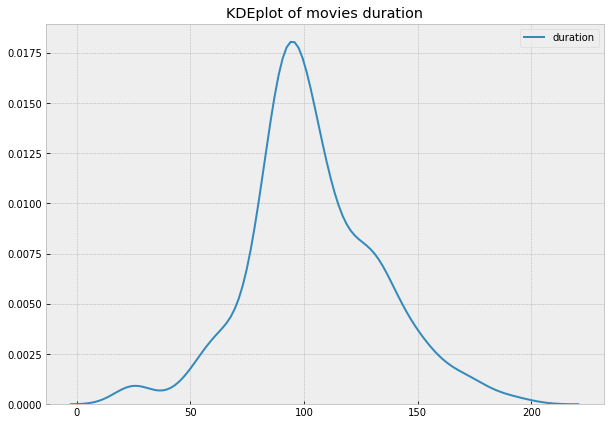

In [51]:
plt.figure(figsize= (10, 7))
plt.title('KDEplot of movies duration')
sns.kdeplot(movies['duration'])

Could there be outliers in this? Time to find out.

In [52]:
lower_bound = q1 - 1.5 * iqr
lower_bound

38.0

In [53]:
movies[movies['duration'] < lower_bound]

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,director
394,Movie,Splatter,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,2009,TV-14,29,Horror Movies,"After committing suicide, a washed-up rocker r...",Joe Dante
607,Movie,LEGO Jurassic World: The Indominus Escape,"A.J. LoCascio, Sendhil Ramamurthy, Fred Tatasc...",United States,2016-10-04,2016,TV-Y7,25,"Children & Family Movies, Comedies",The scientists of Jurassic World create a capt...,Michael D. Black
395,Movie,Pocoyo & The Space Circus,"Stephen Fry, Carys Doyle",Spain,2018-05-01,2008,TV-G,25,Movies,Acrobatic aliens arrive on spaceships and perf...,Alfonso Rodríguez
531,Movie,Dragons: Dawn of the Dragon Racers,"Jay Baruchel, America Ferrera, Zack Pearlman, ...",United States,2018-12-16,2014,TV-PG,27,"Children & Family Movies, Comedies","The ""How to Train Your Dragon"" adventure conti...","Elaine Bogan, John Sanford"
31,Movie,LEGO Marvel Super Heroes: Black Panther,"James Mathis III, Keston John, Yvette Nicole B...",United States,2019-02-01,2018,TV-Y7-FV,22,Children & Family Movies,When Thanos joins forces with villains Killmon...,Michael D. Black
472,Movie,Super Monsters: Vida's First Halloween,"Gigi Saul Guerrero, Elyse Maloway, Vincent Ton...",United States,2019-10-04,2019,TV-Y,24,Children & Family Movies,The Super Monsters share their Halloween tradi...,"Jacob Joice, Steve Ball"
604,Movie,Super Monsters Save Christmas,"Elyse Maloway, Vincent Tong, Erin Mathews, And...",United States,2019-11-26,2019,TV-Y,24,Children & Family Movies,"It's Christmas Eve in Pitchfork Pines, and the...",Steve Ball


Check against Google to validate the duration.
1. Splatter check correct: https://www.imdb.com/title/tt1576464/
2. LEGO Jurassic World: The Indominus Escape check correct: https://www.imdb.com/title/tt6101862/?ref_=fn_al_tt_1
3. Pocoyo & The Space Circus check correct: https://www.imdb.com/title/tt7908512/?ref_=fn_al_tt_1
4. Dragons: Dawn of the Dragon Racers check correct: https://www.imdb.com/title/tt4191768/?ref_=fn_al_tt_1
5. Super Monsters: Vida's First Halloween check correct: https://www.imdb.com/title/tt10927576/?ref_=fn_al_tt_1
6. Super Monsters Save Christmas check correct: https://www.imdb.com/title/tt11193860/?ref_=fn_al_tt_1


Conclusion: Duration of the movies are highly likely accurate but there should be a way to valid the values, try webscraping? 

In [54]:
upper_bound = q3 + 1.5 * iqr
upper_bound

174.0

In [55]:
movies[movies['duration'] > upper_bound]

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,director
242,Movie,Raja Hindustani,"Aamir Khan, Karisma Kapoor, Suresh Oberoi, Joh...",India,2017-05-01,1996,TV-14,177,"Dramas, International Movies, Romantic Movies",When a poor taxi driver falls in love with a w...,Dharmesh Darshan
444,Movie,Dil Hai Tumhaara,"Rekha, Preity Zinta, Mahima Chaudhry, Arjun Ra...",India,2018-04-01,2002,TV-14,176,"Dramas, International Movies, Music & Musicals",The sophisticated son of a powerful businessma...,Kundan Shah
250,Movie,Elephants Dream 4 Hour,"Cas Jansen, Tygo Gernandt",Netherlands,2018-08-23,2006,TV-MA,196,"International Movies, Sci-Fi & Fantasy","Friends Proog and Emo live in a capricious, se...",Bassam Kurdali
305,Movie,Super Deluxe,"Vijay Sethupathi, Fahadh Faasil, Samantha Ruth...",India,2019-06-29,2019,TV-MA,176,"Comedies, Dramas, International Movies","Sex, stigma and spirituality merge in these ec...",Thiagarajan Kumararaja
616,Movie,Mutiny on the Bounty,"Marlon Brando, Trevor Howard, Richard Harris, ...",United States,2019-11-01,1962,TV-PG,185,"Action & Adventure, Classic Movies, Dramas",Marlon Brando gives a nuanced performance as t...,"Lewis Milestone, Carol Reed"
28,Movie,Magnolia,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,1999,R,189,"Dramas, Independent Movies","Through chance, human action, past history and...",Paul Thomas Anderson


Check against Google to validate the duration.
1. Raja Hindustani check correct
2. Dil Hai Tumhaara check correct
3. Elephants Dream 4 Hour check correct
4. Super Deluxe check correct
5. Mutiny on the Bounty check correct
6. Magnolia check correct: https://www.imdb.com/title/tt0175880/?ref_=fn_al_tt_1

In [56]:
movies.groupby(by= ['country', 'duration']).mean()

release_year
country                       duration              
Argentina                     78              2018.0
                              81              1998.0
                              82              2018.0
Argentina, France             87              2017.0
Argentina, Spain              91              2017.0
...                                              ...
United States, India          147             2011.0
United States, Japan          117             2009.0
                              139             1998.0
United States, Sweden         97              2016.0
United States, United Kingdom 148             2010.0

[266 rows x 1 columns]

There are movies with more than 1 countries label, do some text analysis on the countries!

In [57]:
list_country = ', '.join(list(movies['country'])).split(', ')
list_country

['United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Mexico',
 'United States',
 'United States',
 'France',
 'Belgium',
 'United States',
 'China',
 'United States',
 'Spain',
 'United States',
 'Canada',
 'United Kingdom',
 'United States',
 'United States',
 'United States',
 'Nigeria',
 'India',
 'United Kingdom',
 'Denmark',
 'United Kingdom',
 'United States',
 'United States',
 'Spain',
 'United States',
 'Canada',
 'United States',
 'France',
 'United States',
 'United States',
 'United States',
 'Canada',
 'United States',
 'United States',
 'United States',
 'United States',
 'Brazil',
 'United States',
 'United States',
 'United States',
 'Mexico',
 'United States',
 'United Kingdom',
 'United States',
 'Mexico',
 'Italy',
 'United States',
 'United States',
 'Turkey',
 'Turkey',
 'India',
 'United Kingdom',
 'Japan',
 'United States',
 'United Kingdom',
 'United States',
 'United States',
 'France',
 'Belgium',
 'United States',
 'Unit

In [58]:
print(len(set(list_country)))

42


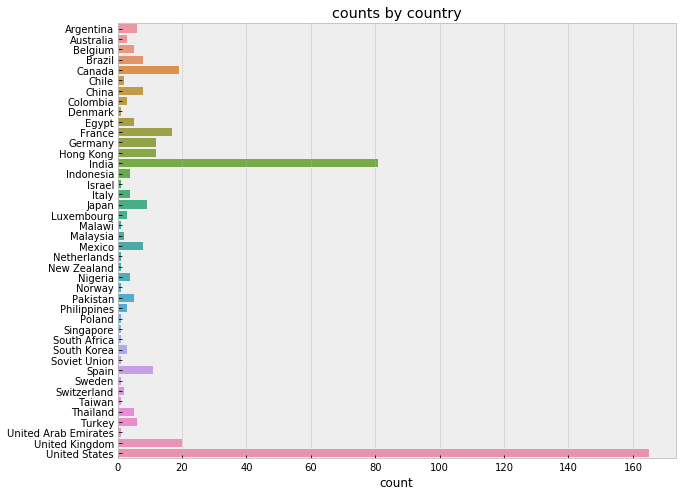

In [59]:
plt.figure(figsize= (10, 8))
plt.title('counts by country')
sns.countplot(y= sorted(list_country))

In [60]:
def singapore(s):
    return 'Singapore' in s
movies[movies['country'].apply(singapore) == True]

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,director
578,Movie,Revenge of the Pontianak,"Nur Fazura, Remy Ishak, Hisyam Hamid, Shenty F...","Singapore, Malaysia",2019-10-24,2019,TV-14,92,"Horror Movies, International Movies",A wedding in a Malaysian village leaves out on...,"Glen Goei, Gavin Yap"


In [61]:
from collections import Counter
Counter(list_country).most_common(3)

[('United States', 165), ('India', 81), ('United Kingdom', 20)]

Top 3 countries in order: United State (165), India (81) and United Kingdom (20)

In [62]:
tvShows = df[df['type'] == 'TV Show']
tvShows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 321 to 61
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11 non-null     object
 1   title         11 non-null     object
 2   cast          11 non-null     object
 3   country       11 non-null     object
 4   date_added    11 non-null     object
 5   release_year  11 non-null     int64 
 6   rating        11 non-null     object
 7   duration      11 non-null     object
 8   listed_in     11 non-null     object
 9   description   11 non-null     object
 10  director      11 non-null     object
dtypes: int64(1), object(10)
memory usage: 1.0+ KB


In [63]:
tvShows

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,director
321,TV Show,Frozen Planet,David Attenborough,"United Kingdom, United States, Spain, Germany,...",2016-01-28,2011,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",Go on a journey through the Arctic and Antarct...,Alastair Fothergill
108,TV Show,Man to Man,"Hae-Jin Park, Sung-woong Park, Min-jung Kim, J...",South Korea,2017-06-10,2017,TV-14,1 Season,"Crime TV Shows, International TV Shows, Korean...","Disguised as a bodyguard, a special agent must...",Chang-Min Lee
349,TV Show,46,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-14,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,Serdar Akar
292,TV Show,Pine Gap,"Parker Sawyers, Jacqueline McKenzie, Steve Tou...",Australia,2018-12-07,2018,TV-MA,1 Season,"International TV Shows, TV Dramas",At top-secret U.S.-Australian joint defense fa...,Mat King
465,TV Show,Bitter Daisies,"María Mera, Toni Salgado, Miquel Insua, Denis ...",Spain,2019-03-29,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",While investigating the disappearance of a tee...,Miguel Conde
82,TV Show,Maggie & Bianca: Fashion Friends,"Emanuela Rei, Giorgia Boni, Sergio Ruggeri, Lu...",Italy,2019-03-31,2017,TV-Y7,1 Season,"Kids' TV, TV Comedies","Originally polar opposites, an American fashio...",Iginio Straffi
407,TV Show,Supernatural,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...",United States,2019-05-03,2019,TV-14,14 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ...",Phil Sgriccia
182,TV Show,Reply 1997,"Jung Eun-ji, Seo In-guk, Shin So-yul, Ji-won E...",South Korea,2019-08-08,2012,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...","As a teen, Shi Won was obsessed with a boy ban...",Shin Won-ho
11,TV Show,The Hockey Girls,"Iria del Río, Nora Navas, Josep Linuesa, Natàl...",Spain,2019-09-20,2019,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas",The passionate members of a girls' roller hock...,"Kiko Cruz Claverol, Patricia Font"
41,TV Show,Cheese in the Trap,"Park Hae-Jin, Kim Go-eun, Seo Kang-jun, Lee Su...",South Korea,2019-10-01,2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...","In this adaptation of a popular webtoon, a poo...",Lee Yoon-jung


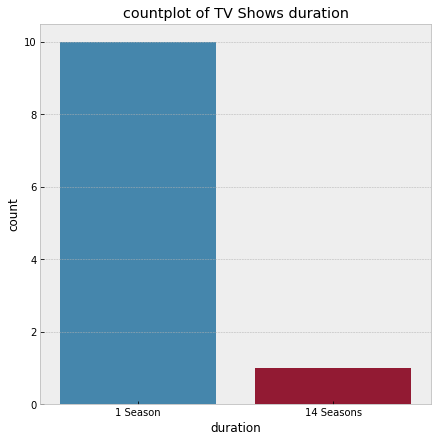

In [64]:
plt.figure(figsize= (7, 7))
plt.title('countplot of TV Shows duration')
sns.countplot(tvShows['duration'])

In [65]:
tvShows[tvShows['duration'] == '14 Seasons']

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,director
407,TV Show,Supernatural,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...",United States,2019-05-03,2019,TV-14,14 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ...",Phil Sgriccia


In [66]:
list_country = ', '.join(list(tvShows['country'])).split(', ')
list_country

['United Kingdom',
 'United States',
 'Spain',
 'Germany',
 'Greece',
 'Canada',
 'South Korea',
 'Turkey',
 'Australia',
 'Spain',
 'Italy',
 'United States',
 'South Korea',
 'Spain',
 'South Korea',
 'South Korea']

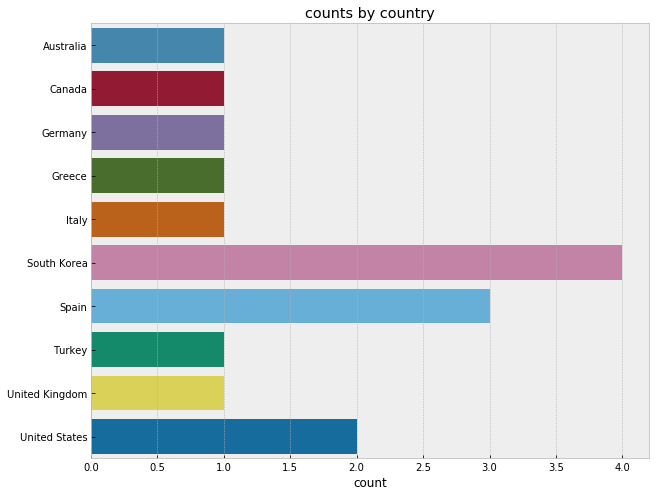

In [67]:
plt.figure(figsize= (10, 8))
plt.title('counts by country')
sns.countplot(y= sorted(list_country))

In [68]:
from collections import Counter
Counter(list_country).most_common(3)

[('South Korea', 4), ('Spain', 3), ('United States', 2)]

Top 3 countries in order: South Korea (4), Spain (3) and United States (2)

### Investigating the correlation between released_year and date_added

To investigate if there is a correlation between the year movies were released and the year movies were added to the netflix (NOT RESTRICTED TO ANY MOVIES).

Hypothesis: There is a correlation because Netflix will want to attract users with the latest movies that were released.

In [69]:
# Year in which movie was added to Netflix
year_added_to_netflix = years

In [70]:
# Year in which movie was released
year_movie_released = df['release_year']

In [71]:
# Year movie was released and year movie was added to Netflix
df_ry_da = df[['release_year', 'date_added']]

In [72]:
def returnYear(date):
    return int(date[:4])
df_ry_da['date_added'] = df_ry_da['date_added'].apply(returnYear)

In [73]:
df_ry_da

,release_year,date_added
394,2009,2009
194,1989,2011
454,1986,2011
310,2013,2013
159,2015,2015
...,...,...
260,2010,2020
350,2020,2020
223,2000,2020
105,2019,2020


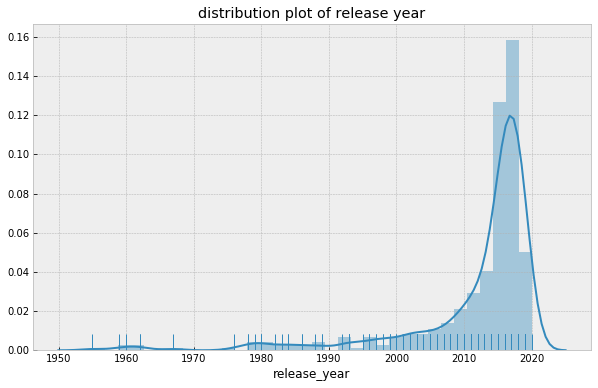

In [74]:
plt.figure(figsize= (10, 6))
plt.title('distribution plot of release year')
sns.distplot(df_ry_da['release_year'], rug= True)

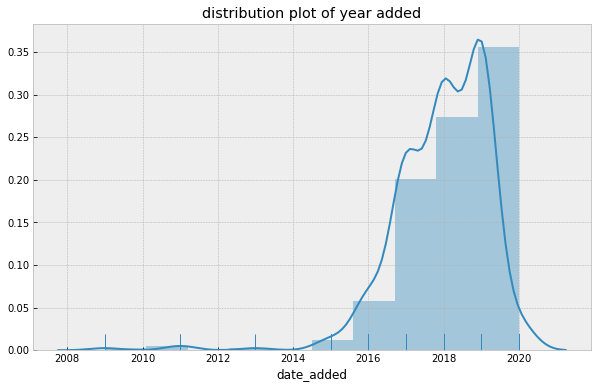

In [75]:
plt.figure(figsize= (10, 6))
plt.title('distribution plot of year added')
sns.distplot(df_ry_da['date_added'], bins= 10, rug= True)

Based on the 2 preceding plots, there seem to be a bit of similarity, let's investigate this using violin plots

Text(0.5, 1.0, 'movies release_year')

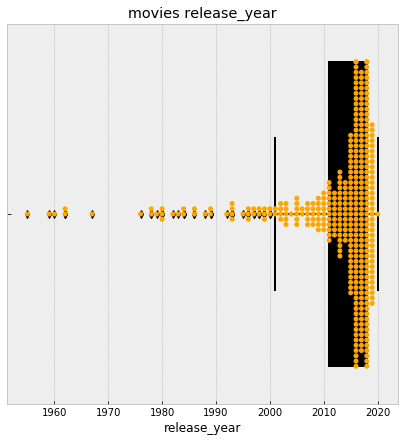

In [76]:
plt.figure(figsize= (7, 7))
sns.boxplot(df_ry_da['release_year'], color= 'black')
sns.swarmplot(df_ry_da['release_year'], color= 'orange')
plt.title('movies release_year')

In [77]:
q1 = df_ry_da['release_year'].quantile(0.25)
median = df_ry_da['release_year'].quantile(0.5)
q3 = df_ry_da['release_year'].quantile(0.75)
iqr = q3 - q1
print('25th Percentile:', q1)
print('75th Percentile:', q3)
print('Median:', median)
print('Interquantile Range:', iqr)

25th Percentile: 2011.0
75th Percentile: 2018.0
Median: 2016.0
Interquantile Range: 7.0


In [78]:
df_ry_da['release_year'].value_counts()

2018    60
2016    60
2017    54
2019    35
2015    31
2013    17
2011    12
2014    12
2012     9
2010     8
2009     7
2005     6
2008     5
2007     5
2003     5
2002     4
1993     4
1996     3
1999     3
1980     3
2001     2
2000     2
1998     2
1997     2
2006     2
1962     2
1989     2
1986     2
1984     2
1978     2
1979     1
1959     1
1960     1
1967     1
1976     1
2020     1
1982     1
1983     1
1988     1
1992     1
1995     1
2004     1
1955     1
Name: release_year, dtype: int64

In [79]:
sum(df_ry_da['release_year'].value_counts()[:9]) - 35

255

The bulk of the movies are released in 2011 and 2018, a total of 255 movies/tv shows released during that period of time.

Text(0.5, 1.0, 'movies added to netflix year')

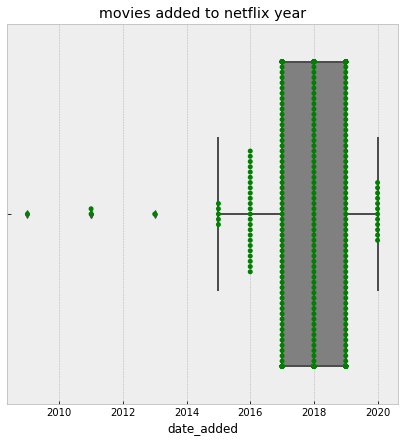

In [80]:
plt.figure(figsize= (7, 7))
sns.boxplot(df_ry_da['date_added'], color= 'grey')
sns.swarmplot(df_ry_da['date_added'], color= 'green')
plt.title('movies added to netflix year')

In [81]:
q1 = df_ry_da['date_added'].quantile(0.25)
median = df_ry_da['date_added'].quantile(0.5)
q3 = df_ry_da['date_added'].quantile(0.75)
iqr = q3 - q1
print('25th Percentile:', q1)
print('75th Percentile:', q3)
print('Median:', median)
print('Interquantile Range:', iqr)

25th Percentile: 2017.0
75th Percentile: 2019.0
Median: 2018.0
Interquantile Range: 2.0


In [82]:
df_ry_da['date_added'].value_counts()

2019    135
2018    113
2017     83
2016     24
2020     12
2015      5
2011      2
2013      1
2009      1
Name: date_added, dtype: int64

There could be a few reasons for the similarities:
1. Between 2016 and 2019 there are a total of 242 movies/tv shows added to netflix. Likewise, between 2016 and 2019, there a total of 209 new movies released. The difference could be attributed to movies/tv shows that were released before 2016 but added to Netflix in a later time. 
2. "On average, it can be anywhere from 2 - 6 months after the movie leaves theaters." This is to attract new users as well as to retain existing users. Keeping their repository of movies/tv shows updated. Hence the positive correlation. 

To investigate the time taken for Netflix to add movies after releasing.

Hypothesis: Last year 6 months, if possible to ascertain

In [83]:
# TO DO ^^^^

In [84]:
df.columns

Index(['type', 'title', 'cast', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'director'],
      dtype='object')

## Recommender System - Content Based
Given:
1. Type -  Movie/TV Shows
2. Cast - Lead actors/actresses
3. Country - Country movies' produced in 
4. Rating - What rating 
5. Listed In - Genre (?)
6. Director - Director/Directors of the Movie/TV Show
7. Description (KIV)

In [85]:
# User Input goes here
user_input = None

In [86]:
recommenderSys_df = df[['type', 'cast', 'country', 'rating', 'listed_in', 'director']]
recommenderSys_df

,type,cast,country,rating,listed_in,director
394,Movie,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,TV-14,Horror Movies,Joe Dante
194,Movie,"Judith Light, Lukas Haas, Michael Bowen, Nikki...",United States,TV-PG,Dramas,John Herzfeld
454,Movie,"Denzel Washington, Lynn Whitfield, Richard Mas...",United States,NR,Dramas,Eric Laneuville
310,Movie,Aziz Ansari,United States,NR,Stand-Up Comedy,"Will Lovelace, Dylan Southern"
159,Movie,Jen Kirkman,United States,TV-MA,Stand-Up Comedy,Lance Bangs
...,...,...,...,...,...,...
260,Movie,"Steve Austin, Gil Bellows, Gary Daniels, Marie...",Canada,R,Action & Adventure,Keoni Waxman
350,Movie,"Hánssel Casillas, Loreto Peralta, Andrea Sutto...",Mexico,TV-14,"Comedies, International Movies, Romantic Movies",Yibrán Asuad
223,Movie,"Paul Newman, Linda Fiorentino, Dermot Mulroney...","Germany, United States, United Kingdom, Canada",PG-13,"Action & Adventure, Comedies, Dramas",Marek Kanievska
105,Movie,"Laura Marano, Vanessa Marano, Christopher Tava...",United States,R,Dramas,Jeffrey G. Hunt


### Text Processing
1. Removing numbers/stopwords (NA)/punctuations/lowercase
2. Stemming/Lemmatization/PoS etc (NA) 

This is a VERY trivial implementation of a recommender system!!! Content based by cosine similarity

In [87]:
col = recommenderSys_df.columns

In [88]:
def lowercase(s):
    return s.lower()
for c in col:
    recommenderSys_df[c] = recommenderSys_df[c].apply(lowercase)

In [89]:
recommenderSys_df.head()

,type,cast,country,rating,listed_in,director
394,movie,"corey feldman, tony todd, tara leigh, erin way...",united states,tv-14,horror movies,joe dante
194,movie,"judith light, lukas haas, michael bowen, nikki...",united states,tv-pg,dramas,john herzfeld
454,movie,"denzel washington, lynn whitfield, richard mas...",united states,nr,dramas,eric laneuville
310,movie,aziz ansari,united states,nr,stand-up comedy,"will lovelace, dylan southern"
159,movie,jen kirkman,united states,tv-ma,stand-up comedy,lance bangs


In [90]:
def split(s):
    return s.split(', ')
for c in col:
    recommenderSys_df[c] = recommenderSys_df[c].apply(split)

In [91]:
recommenderSys_df.head()

,type,cast,country,rating,listed_in,director
394,[movie],"[corey feldman, tony todd, tara leigh, erin wa...",[united states],[tv-14],[horror movies],[joe dante]
194,[movie],"[judith light, lukas haas, michael bowen, nikk...",[united states],[tv-pg],[dramas],[john herzfeld]
454,[movie],"[denzel washington, lynn whitfield, richard ma...",[united states],[nr],[dramas],[eric laneuville]
310,[movie],[aziz ansari],[united states],[nr],[stand-up comedy],"[will lovelace, dylan southern]"
159,[movie],[jen kirkman],[united states],[tv-ma],[stand-up comedy],[lance bangs]


In [92]:
def removews(l):
    return [re.sub('[^0-9a-z]', '', w) for w in l]
for c in col:
    recommenderSys_df[c] = recommenderSys_df[c].apply(removews)

In [93]:
recommenderSys_df.head()

,type,cast,country,rating,listed_in,director
394,[movie],"[coreyfeldman, tonytodd, taraleigh, erinway, m...",[unitedstates],[tv14],[horrormovies],[joedante]
194,[movie],"[judithlight, lukashaas, michaelbowen, nikkico...",[unitedstates],[tvpg],[dramas],[johnherzfeld]
454,[movie],"[denzelwashington, lynnwhitfield, richardmasur...",[unitedstates],[nr],[dramas],[ericlaneuville]
310,[movie],[azizansari],[unitedstates],[nr],[standupcomedy],"[willlovelace, dylansouthern]"
159,[movie],[jenkirkman],[unitedstates],[tvma],[standupcomedy],[lancebangs]


In [94]:
def join(s):
    return ' '.join(s)
for c in col:
    recommenderSys_df[c] = recommenderSys_df[c].apply(join)

In [95]:
recommenderSys_df.head()

,type,cast,country,rating,listed_in,director
394,movie,coreyfeldman tonytodd taraleigh erinway markal...,unitedstates,tv14,horrormovies,joedante
194,movie,judithlight lukashaas michaelbowen nikkicox ge...,unitedstates,tvpg,dramas,johnherzfeld
454,movie,denzelwashington lynnwhitfield richardmasur ak...,unitedstates,nr,dramas,ericlaneuville
310,movie,azizansari,unitedstates,nr,standupcomedy,willlovelace dylansouthern
159,movie,jenkirkman,unitedstates,tvma,standupcomedy,lancebangs


In [96]:
recommenderSys_df['corpus'] = recommenderSys_df['type'] + ' ' + recommenderSys_df['cast'] + ' ' + recommenderSys_df['country'] + ' ' + recommenderSys_df['rating'] + ' ' + recommenderSys_df['listed_in'] + ' ' + recommenderSys_df['director']

In [119]:
recommenderSys_df.drop(labels= recommenderSys_df.columns[:-1], axis= 1, inplace= True)

In [120]:
recommenderSys_df

,corpus
394,movie coreyfeldman tonytodd taraleigh erinway ...
194,movie judithlight lukashaas michaelbowen nikki...
454,movie denzelwashington lynnwhitfield richardma...
310,movie azizansari unitedstates nr standupcomedy...
159,movie jenkirkman unitedstates tvma standupcome...
...,...
260,movie steveaustin gilbellows garydaniels marie...
350,movie hnsselcasillas loretoperalta andreasutto...
223,movie paulnewman lindafiorentino dermotmulrone...
105,movie lauramarano vanessamarano christophertav...


### NLP and cosine similarity

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [123]:
# SparseDF for corpus
cv = CountVectorizer()
words_sparse_matrix6 = cv.fit_transform(recommenderSys_df['corpus'])
sparse_df = pd.DataFrame(columns= list(cv.get_feature_names()), data= words_sparse_matrix6.A)

In [124]:
sparse_df

,aamirkhan,aanandrai,aanchalmunjal,aaronmarshall,aartimann,aashifsheikh,aayammehta,abbas,abdulqadir,abdurarsyad,...,zhangziyi,zhanyuhao,zhaobenshan,zhoudongyu,zhuzhu,zinabethune,zkanuur,zlemakar,zoesaldana,zoyaakhtar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
cs_df = pd.DataFrame(cosine_similarity(sparse_df, sparse_df))

In [126]:
cs_df

,0,1,2,3,4,5,6,7,8,9,...,366,367,368,369,370,371,372,373,374,375
0,1.000000,0.167248,0.201008,0.227921,0.246183,0.077850,0.161165,0.213201,0.075378,0.083624,...,0.150756,0.134840,0.161165,0.134840,0.142134,0.080582,0.146254,0.134840,0.155700,0.146254
1,0.167248,1.000000,0.277350,0.209657,0.226455,0.143223,0.222375,0.130744,0.069338,0.153846,...,0.138675,0.186052,0.148250,0.186052,0.130744,0.074125,0.067267,0.186052,0.214834,0.067267
2,0.201008,0.277350,1.000000,0.377964,0.272166,0.258199,0.356348,0.157135,0.083333,0.092450,...,0.166667,0.149071,0.178174,0.223607,0.157135,0.089087,0.080845,0.223607,0.258199,0.080845
3,0.227921,0.209657,0.377964,1.000000,0.462910,0.195180,0.303046,0.178174,0.094491,0.104828,...,0.188982,0.169031,0.202031,0.169031,0.178174,0.101015,0.091670,0.169031,0.195180,0.091670
4,0.246183,0.226455,0.272166,0.462910,1.000000,0.105409,0.218218,0.192450,0.102062,0.113228,...,0.204124,0.182574,0.218218,0.182574,0.192450,0.109109,0.099015,0.182574,0.210819,0.099015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,0.080582,0.074125,0.089087,0.101015,0.109109,0.069007,0.071429,0.062994,0.066815,0.074125,...,0.066815,0.119523,0.071429,0.059761,0.125988,1.000000,0.064820,0.179284,0.069007,0.129641
372,0.146254,0.067267,0.080845,0.091670,0.099015,0.250490,0.129641,0.171499,0.060634,0.000000,...,0.121268,0.054233,0.064820,0.054233,0.057166,0.064820,1.000000,0.108465,0.062622,0.117647
373,0.134840,0.186052,0.223607,0.169031,0.182574,0.173205,0.239046,0.158114,0.055902,0.248069,...,0.167705,0.250000,0.119523,0.150000,0.210819,0.179284,0.108465,1.000000,0.173205,0.108465
374,0.155700,0.214834,0.258199,0.195180,0.210819,0.133333,0.207020,0.121716,0.064550,0.071611,...,0.129099,0.115470,0.138013,0.173205,0.121716,0.069007,0.062622,0.173205,1.000000,0.062622


In [128]:
cv.get_feature_names()

['aamirkhan',
 'aanandrai',
 'aanchalmunjal',
 'aaronmarshall',
 'aartimann',
 'aashifsheikh',
 'aayammehta',
 'abbas',
 'abdulqadir',
 'abdurarsyad',
 'abdurrehman',
 'abhaydeol',
 'abhijitsinha',
 'abhinavgomatam',
 'abhishekkapoor',
 'actionadventure',
 'adamchan',
 'adamcollins',
 'adamcrew',
 'adamdemos',
 'adamdriver',
 'adamlarsonbroder',
 'adamnimoy',
 'adampally',
 'adamrose',
 'adeelhashmi',
 'adeelhussain',
 'adelfacalvo',
 'adilhussain',
 'adisorntresirikasem',
 'aditiraohydari',
 'adityaroykapoor',
 'adityasarpotdar',
 'admiles',
 'adoradei',
 'adrianapaz',
 'adriangrenier',
 'adrianholmes',
 'adrianotardiolo',
 'adrianpetriw',
 'adriennebailon',
 'adrinyospe',
 'agamuhlach',
 'agha',
 'agnesegraziani',
 'ahmedeid',
 'ahmedfouadselim',
 'ahmedhelmy',
 'ahnaoreilly',
 'ahnkilkang',
 'aidancook',
 'aidanshipley',
 'aikayano',
 'ainyjaffri',
 'aitorurtzelai',
 'ajaydevgn',
 'ajbowen',
 'ajlocascio',
 'akhangal',
 'akhilendramishra',
 'akiootsuka',
 'akitoyosaki',
 'akosuabusi

In [152]:
user = cv.transform(['movie unitedstates fiction danielradchiffe r guillermodeltoro'])
user_sparse_df = pd.DataFrame(user.A, columns= list(cv.get_feature_names()))

In [153]:
user_sparse_df

,aamirkhan,aanandrai,aanchalmunjal,aaronmarshall,aartimann,aashifsheikh,aayammehta,abbas,abdulqadir,abdurarsyad,...,zhangziyi,zhanyuhao,zhaobenshan,zhoudongyu,zhuzhu,zinabethune,zkanuur,zlemakar,zoesaldana,zoyaakhtar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
user_cs = pd.DataFrame(cosine_similarity(sparse_df, user_sparse_df))

In [155]:
user_cs.sort_values(by= 0, ascending= False).head()

,0
277,0.57735
354,0.57735
296,0.57735
51,0.57735
52,0.57735


In [166]:
df.loc[[277, 354, 296, 52]]

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,director
277,Movie,Payday,"Baaj Adebule, Ebiye Victor, Meg Otanwa, Bisola...",Nigeria,2019-11-29,2018,TV-MA,110 min,"Comedies, Independent Movies, International Mo...","After an expensive night out, two flatmates ge...",Cheta Chukwu
354,Movie,Swearnet: The Movie,"Mike Smith, John Paul Tremblay, Robb Wells, Pa...",Canada,2017-09-24,2014,NR,112 min,"Comedies, International Movies","After losing a TV network deal, the Trailer Pa...",Warren P. Sonoda
296,Movie,Rebel Without a Cause,"James Dean, Natalie Wood, Sal Mineo, Jim Backu...",United States,2019-11-01,1955,PG-13,111 min,"Classic Movies, Dramas",When Jim Stark arrives in a new town with his ...,Nicholas Ray
52,Movie,Bean: The Ultimate Disaster Movie,"Rowan Atkinson, Peter MacNicol, John Mills, Pa...","United Kingdom, United States",2018-08-01,1997,PG-13,89 min,"Comedies, International Movies",Disaster-prone Mr. Bean is sent to Los Angeles...,Mel Smith
